<a href="https://colab.research.google.com/github/tahamsi/Computer-Vision/blob/main/Face_Detection_MTCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/Computer-Vision)

# Prepare the environment

**MTCNN**, short for Multi-Task Cascaded Convolutional Neural Networks, is a neural network designed for the detection of faces and facial landmarks in images. First introduced in 2016 by [Zhang et al.](https://pypi.org/project/mtcnn/#zhang2016), **MTCNN** has since gained widespread popularity and is renowned for its high accuracy in face detection.
The architecture of **MTCNN** comprises three interconnected neural networks arranged in a cascade. This implementation of the **MTCNN** face detector is tailored for Keras in Python 3.x.

**The detector object**

The detector produces a list of JSON objects, each featuring three primary keys: 'box,' 'confidence,' and 'keypoints.'


*   The 'box' key represents the bounding box and is formatted as [x, y, width, height].

*   The 'confidence' key corresponds to the probability of the bounding box accurately matching a face.
*   The 'keypoints' key contains a JSON object with subkeys such as 'left_eye,' 'right_eye,' 'nose,' 'mouth_left,' and 'mouth_right,' each identified by a pixel position (x, y).

**Model**

Regarding the model, the default **MTCNN** includes a pre-packaged face detection weights model. This model is derived from the implementation in Facenet’s **MTCNN** and is consolidated into a single file within the 'data' folder relative to the module's path. Users can customize this model by substituting it in the MTCNN() constructor during instantiation. The model should be numpy-based and include the three primary keys—“pnet,” “rnet,” and “onet”—with each key holding the weights for the respective layers of the network.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Nov 12 22:56:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Now install MTCNN using the following comand:

In [ ]:
! pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.7 MB/s eta 0:00:00


Import all the necessary libraries for this project, including TensorFlow for the main framework, Matplotlib for visualization, urllib.request.urlopen for downloading data from a web address, PIL.Image for reading an image file, NumPy for data manipulation, and os for running several operating system's command. Moreover, MTCNN as the main class for face detection.

In [ ]:
import tensorflow as tf
from matplotlib import pyplot
from urllib.request import urlopen
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Develop a class incorporating essential methods, including:
*   draw_facebox: This method is designed for drawing a bounding box around each identified face.

*   cover_facebox: Utilize this method to identify facial keypoints and cover them with a circle.
*   extract_face: Specify the image size (default is 224 by 224) within this function. It accepts a filename (modifiable to an opened file), a pre-trained neural network for detection (in this instance, MTCNN), and returns a list of embeddings. The length of the list corresponds to the number of detected faces.

*   look_for_faces: This method takes an image file as input and searches for all faces within the given file.











In [ ]:
class Face:
  def __init__(self):
    self.detector = MTCNN()

  def draw_facebox(self, filename):
    pixels = np.asarray(filename)
    pyplot.imshow(pixels)
    results = self.detector.detect_faces(pixels)
    ax = pyplot.gca()
    for result in results:
        x, y, width, height = result['box']
        rect = pyplot.Rectangle((x, y), width, height, fill=False, color='orange')
        ax.add_patch(rect)
    pyplot.show()

  def cover_facebox(self, filename, radius, color):
    pixels = np.asarray(filename)
    pyplot.imshow(pixels)
    results = self.detector.detect_faces(pixels)
    ax = pyplot.gca()
    for result in results:
      for key, value in result['keypoints'].items():
        # create and draw dot
        dot = pyplot.Circle(value, radius = radius, color = color)
        ax.add_patch(dot)
    return ax

  def extract_face(self, filename, required_size=(224, 224)):
    pixels = np.asarray(filename)#pyplot.imread(filename)
    results = self.detector.detect_faces(pixels)
    if len(results)==0:
        return 0
    res = []
    for result in results:
        x1, y1, width, height = result['box']
        x2, y2 = x1 + width, y1 + height
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face.copy())
        image = image.resize(required_size)
        face_array = asarray(image)
        res.append(face_array)
    return res

  def look_for_faces(self, file_name, show=True):
    pixels = self.extract_face(file_name)
    if pixels ==0:
      print("No face has been detected!")
    else:
      if show:
        for pixel in pixels:
          pyplot.imshow(pixel)
          pyplot.show()
      else:
        print(len(pixels), "faces have been detected!")

# Running the model

Instantiate the defined class.

In [ ]:
face = Face()

Load the image file.

Note: You are welcome to upload an image file that piques your interest, potentially containing one or more faces.

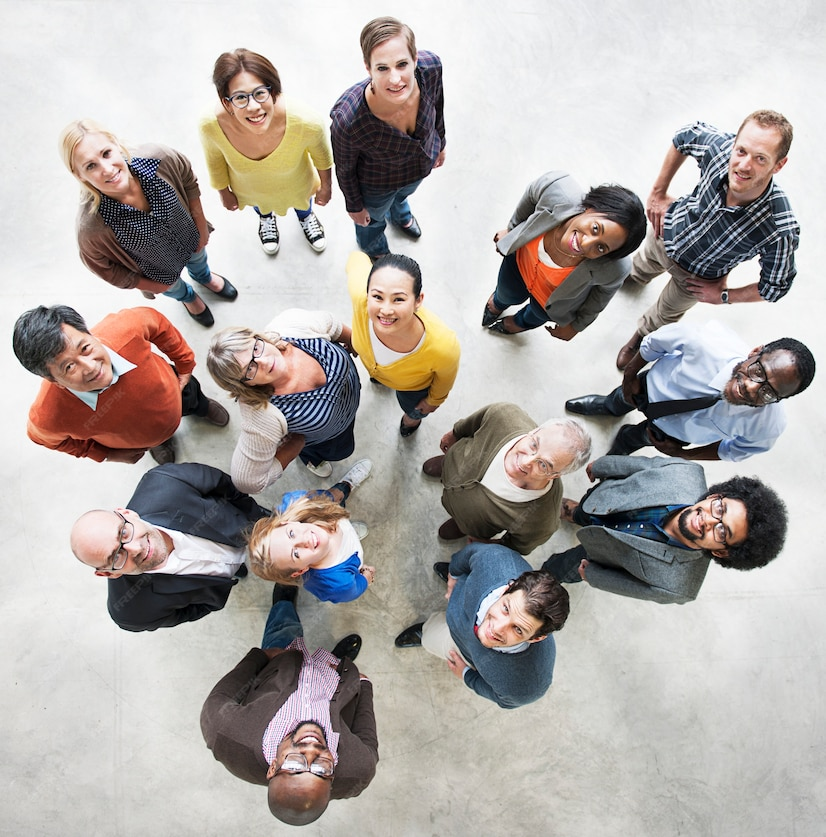

In [ ]:
url = "https://img.freepik.com/premium-photo/blurred-vision-diverse-people_53876-10652.jpg?w=826"
img = Image.open(urlopen(url))
img

Drawing bounding boxes around faces.

4/4 [==============================] - 0s 34ms/step


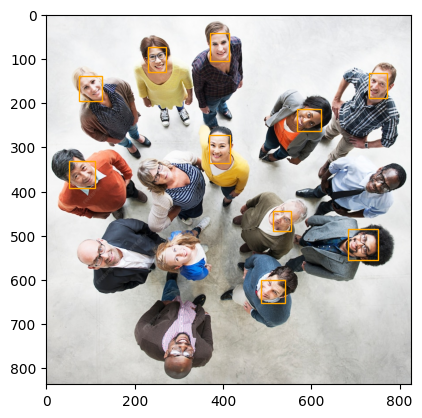

In [ ]:
face.draw_facebox(img)

Extarcting faces inside of the file.

4/4 [==============================] - 0s 4ms/step


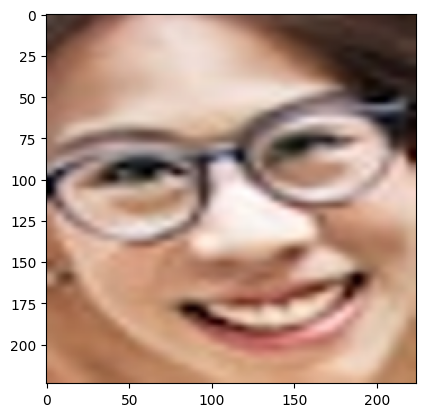

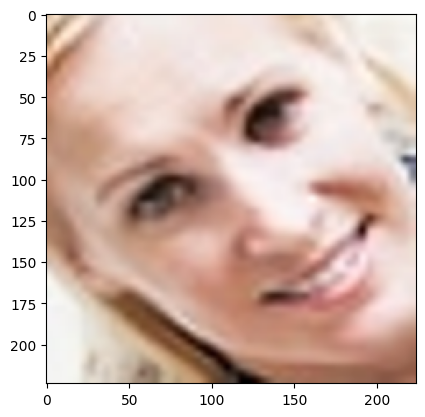

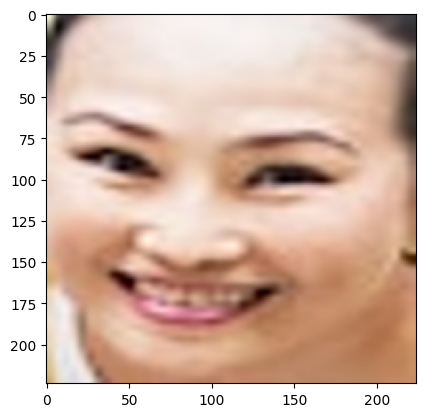

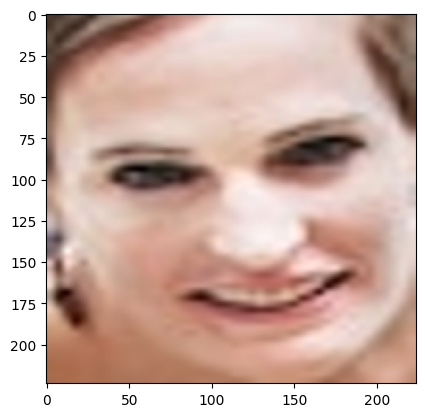

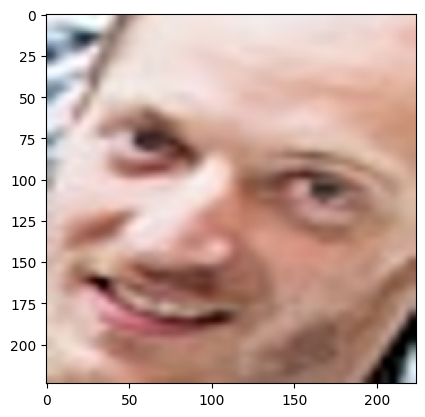

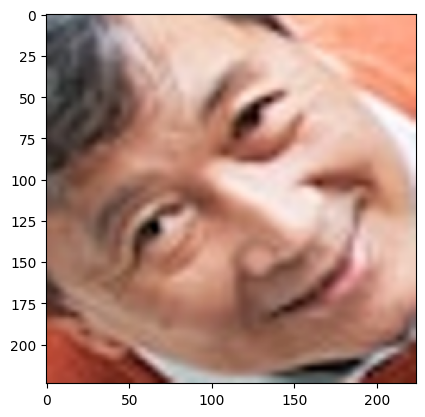

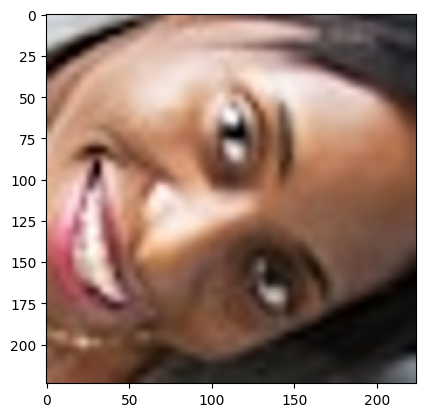

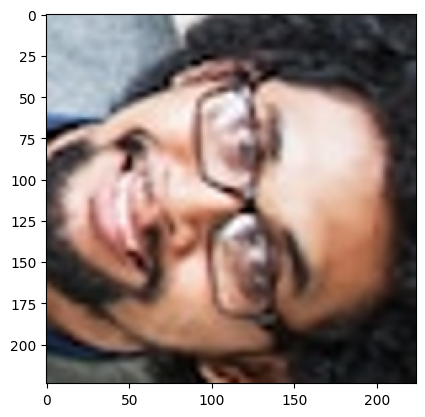

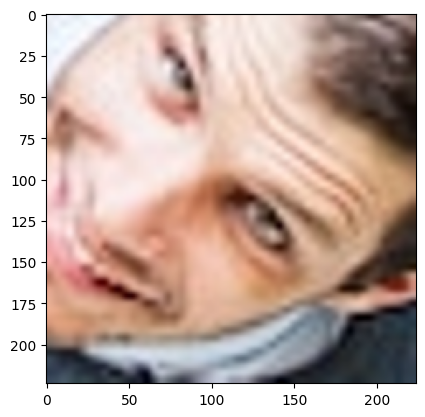

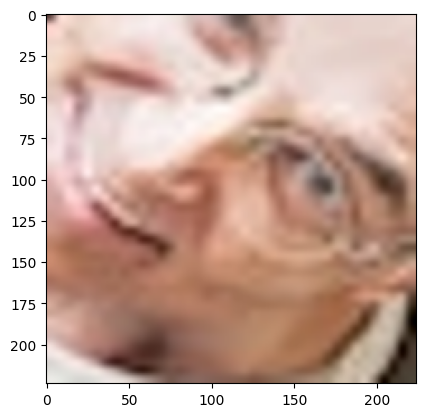

In [ ]:
face.look_for_faces(img)

Covering keypoints with a circle.

4/4 [==============================] - 0s 4ms/step


<Axes: >

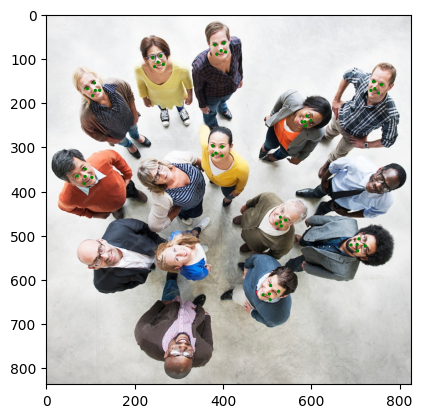

In [ ]:
face.cover_facebox(img, 2, 'green')